In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iterativeClustering import clusterings_with_hors, bfs_merge
from cluster import build_distance_matrix, distance_values, get_seq_as_txt
from Bio import SeqIO
from Bio import Phylo
import json
from showHOR import show_hor, show_hors, show_hor_tree
import hammingdist
import platform
import math

Elapsed time:  9.5367431640625e-07


In [2]:
seq_record = SeqIO.read("./data/human_T2T_chr2_D2Z1.fasta", "fasta")
input_seq = str(seq_record.seq)

In [3]:
monomer_size = 171
dna_seqs = [input_seq[sq_index * monomer_size : (sq_index + 1) * monomer_size] for sq_index in range(len(input_seq) // monomer_size)]

In [4]:
dna_seq_dists = build_distance_matrix(dna_seqs)

(array([2.1330000e+03, 5.7910000e+03, 1.5012000e+04, 2.6673000e+04,
        4.2453000e+04, 5.9218000e+04, 7.5273000e+04, 8.9025000e+04,
        1.0254600e+05, 1.1199300e+05, 1.2095900e+05, 1.2626900e+05,
        1.3165600e+05, 1.3515300e+05, 1.3858400e+05, 1.4019400e+05,
        1.4327200e+05, 1.4478900e+05, 1.4762600e+05, 1.4927100e+05,
        1.5310200e+05, 1.5609800e+05, 1.6255000e+05, 1.6995700e+05,
        1.8159300e+05, 1.9472500e+05, 2.1047900e+05, 2.2752300e+05,
        2.4695900e+05, 2.6680200e+05, 2.8535500e+05, 2.9717600e+05,
        3.0780600e+05, 3.1381200e+05, 3.1819800e+05, 3.1943300e+05,
        3.2137400e+05, 3.2118500e+05, 3.2304300e+05, 3.2116400e+05,
        3.2625600e+05, 3.2861100e+05, 3.4165200e+05, 3.5152300e+05,
        3.7747300e+05, 4.0571600e+05, 4.4732600e+05, 4.9628400e+05,
        5.5380500e+05, 6.0631800e+05, 6.5662900e+05, 6.8939000e+05,
        7.1340800e+05, 7.2297900e+05, 7.3069800e+05, 7.2604300e+05,
        7.3223300e+05, 7.2734600e+05, 7.2739700e

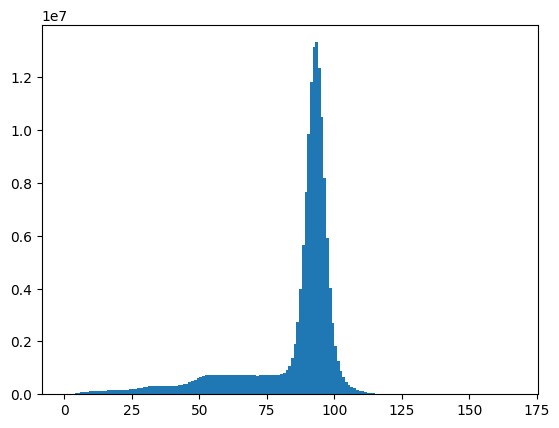

In [5]:
dist_values = distance_values(dna_seq_dists)
plt.hist(dist_values, bins=int(max(dist_values)))


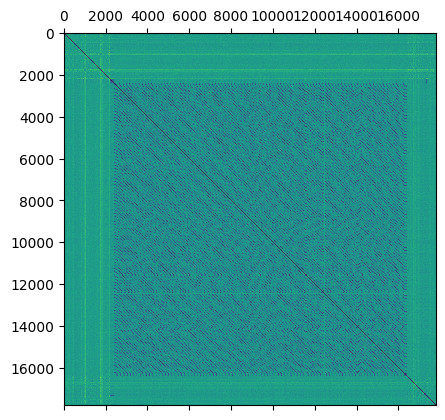

In [6]:
plt.matshow(dna_seq_dists)

In [7]:
# plt.matshow(matrix_closure(dna_seq_dists<=4))

In [8]:
clusterings, tree, hors, hor_tree_root = clusterings_with_hors(dna_seq_dists,min_len_loop=1,min_loop_reps=3)

Start of clusterings_with_hors
merge_clusters with distance as (17787, 17787), clusters as (), and max distance 0
adjacency matrix sparsity is 0.9999302952671055
merge_clusters with distance as (16361, 16361), clusters as (16361, 17787), and max distance 1
adjacency matrix sparsity is 0.9999172190381598


In [ ]:
clusterings_simple = clusterings_with_hors(dna_seq_dists,min_len_loop=1,require_increasing_loop_coverage=False,
        require_relevant_loop_coverage=False, build_tree=False, order_clusters=True)

Start of clusterings_with_hors
merge_clusters with distance as (803, 803), clusters as (), and max distance 0


adjacency matrix sparsity is 0.9978799923698336
merge_clusters with distance as (704, 704), clusters as (704, 803), and max distance 1
adjacency matrix sparsity is 0.9985028731921488
merge_clusters with distance as (685, 685), clusters as (685, 803), and max distance 2
adjacency matrix sparsity is 0.9984378496456924
merge_clusters with distance as (661, 661), clusters as (661, 803), and max distance 3
adjacency matrix sparsity is 0.998395590964957
merge_clusters with distance as (641, 641), clusters as (641, 803), and max distance 4
adjacency matrix sparsity is 0.9983036450943217
merge_clusters with distance as (613, 613), clusters as (613, 803), and max distance 5
adjacency matrix sparsity is 0.9981823939707639
merge_clusters with distance as (578, 578), clusters as (578, 803), and max distance 6
adjacency matrix sparsity is 0.9977610421331162
merge_clusters with distance as (494, 494), clusters as (494, 803), and max distance 7
adjacency matrix sparsity is 0.9975905194315593
merge_cl

In [ ]:
[
    [str(loop)
    for loop in clustering.loops]
    for clustering in clusterings
]

[['p in [559:562],[568:572],[579:586],[587:594],[596:610],[614:630],[632:638],[641:648],[651:660],[662:669],[707:710],[715:721],[722:725],[727:733],[734:737],[739:745],[746:749],[751:757],[758:761]',
  '** in [670:682]',
  'WfgWWWffhWWW in [73:156]',
  'pppppp*ppp** in [715:763]',
  'P in [17:22],[40:44],[45:48],[317:320],[336:339],[342:345],[350:353],[360:364],[367:371],[374:378],[381:385],[485:488]',
  'PPQ in [20:29]',
  'Q in [220:223],[228:231],[238:242],[254:264],[268:277],[279:284],[540:545]',
  'QPQPPPP in [357:390]'],
 ['R in [52:58],[59:62],[69:72],[75:79],[81:86],[87:91],[93:98],[99:103],[105:110],[111:115],[117:122],[123:127],[129:134],[135:139],[141:146],[147:151],[153:156],[157:160],[161:164],[165:169],[170:175],[176:179],[180:184],[188:191],[192:195],[196:199],[200:203],[205:208]',
  'RTRRRRTTRRRR in [73:156]',
  'N in [15:29],[30:34],[35:51],[216:219],[220:223],[224:227],[228:231],[232:235],[236:242],[243:246],[247:252],[254:267],[268:284],[285:288],[289:305],[306:315],

In [ ]:
[
    [str(loop)
    for loop in clustering.loops]
    for clustering in clusterings_simple
]

[['D in [17:22],[40:44],[45:48],[317:320],[336:339],[342:345],[350:353],[360:364],[367:371],[374:378],[381:385],[485:488]',
  'DDB in [20:29]',
  'C in [52:56],[59:62],[76:79],[82:86],[88:91],[94:98],[100:103],[106:110],[112:115],[118:122],[124:127],[130:134],[136:139],[142:146],[148:151],[170:175],[188:191],[192:195],[196:199],[200:203],[205:208]',
  'CFOCCCFFNCCC in [73:156]',
  'B in [220:223],[228:231],[238:242],[254:264],[268:277],[279:284],[540:545]',
  'BDBDDDD in [357:390]',
  'E in [413:417],[420:424],[427:431],[434:438],[554:558]',
  'KEKEEEE in [410:443]',
  'H in [454:457],[472:475]',
  'A in [559:562],[568:572],[579:586],[587:594],[596:610],[614:630],[632:638],[641:648],[651:660],[662:669],[707:710],[715:721],[722:725],[727:733],[734:737],[739:745],[746:749],[751:757],[758:761]',
  'G in [574:577],[610:613],[638:641]',
  'JI in [670:682]',
  'AAAAAAVAAAUQ in [715:763]'],
 ['A in [15:29],[30:34],[35:51],[216:219],[220:223],[224:227],[228:231],[232:235],[236:242],[243:246],[

In [ ]:
[
    str(clustering)
    for clustering in clusterings
]

["Num clusters: 186, Seq: ABCDEFFGHIJJKLMNOPPPPPQPPQPPQRPSPQTPQPUQPPPPQPPPQPPVWWWWXWYWWWZWWaWbcdWWeWfgWWWffhWWWWfgWWWffhWWWWfgWWWffhWWWWfgWWWffhWWWWfgWWWffhWWWWfgWWWffhWWWWfgWWWffhWWijWWiWkWlWmWWfWWWWWiWkWlWmWWfWWfWWWnWWWfWWWnWWWffWWWopqprQQsQPQtQQQsQPQtQQQsQPQtuvQQQQwPPQxQQPPQtyQQQQQQQQQQPPQzQQQQQQQQQ*PQQQQQ*PPQ*Q*PQQ*PQQ*QQ*Q***Q*Q*PPQQP**PPP*PQPP*Q*P*Q**QPQPPPQPQPPP*QP**PPP*P**QPQPPPPQPQPPPPQPQPPPPQPQPPPPQPQPP***********************************************************************************************PPP*QP**PP****************************************Q**PPQQQQQ*QQP**********ppp**p***pppp*******ppppppp*ppppppp**pppppppppppppp****pppppppppppppppp**pppppp***ppppppp*p*ppppppppp**ppppppp**************************************ppp***p*pppppp*ppp**pppppp*ppp**pppppp*ppp**pppppp*ppp******************************************, Loops: ['p in [559:562],[568:572],[579:586],[587:594],[596:610],[614:630],[632:638],[641:648],[651:660],[662:669],[707:710],[715:721],[722:725],[727:733],[734:737],[739:

In [ ]:
output_filename = f'data/vitis/clusterings/{seq_record.id.replace(":","_")}.json'
with open(output_filename, "w") as write_file:
    json.dump([
        clustering.to_dict() for clustering in clusterings
    ], write_file, indent=4)

Subtree: []
None


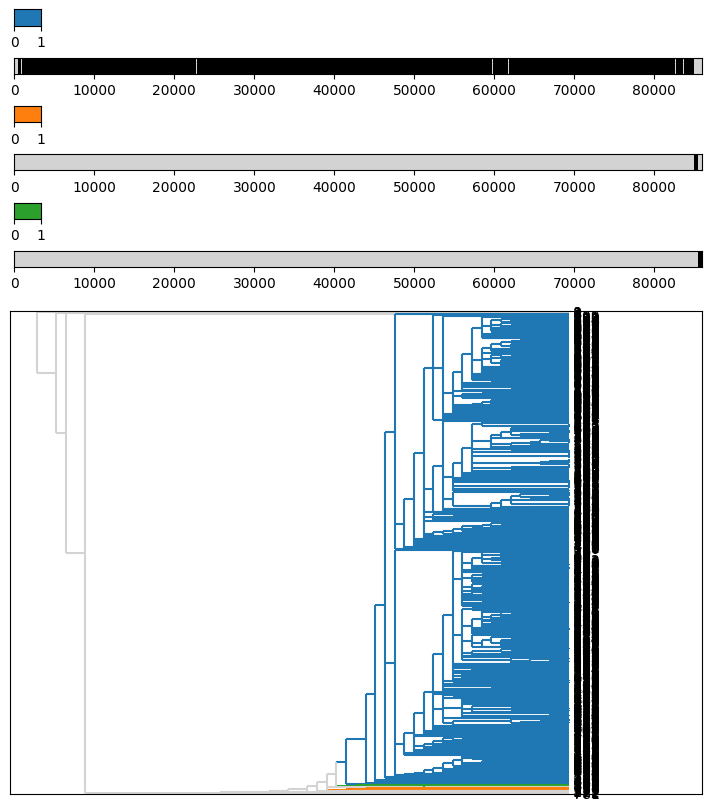

Subtree: [0]
None


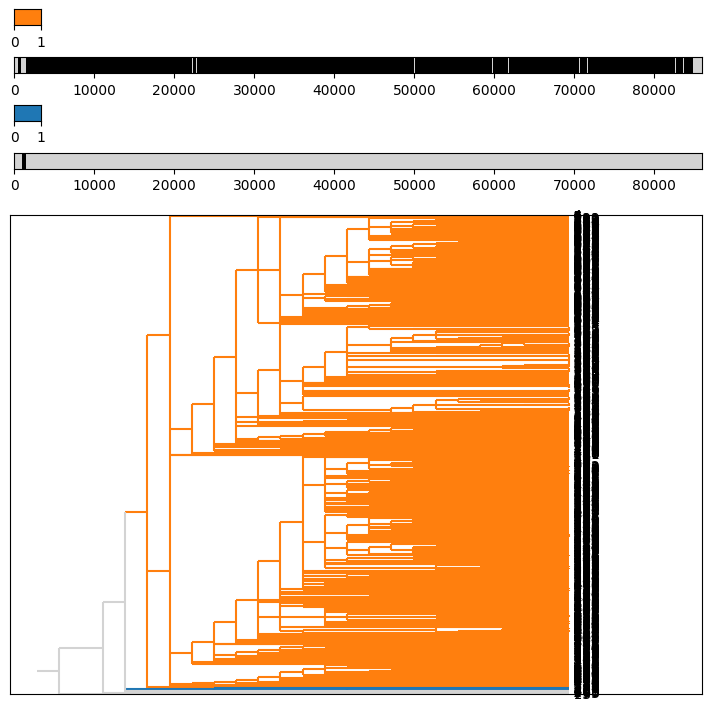

Subtree: [0, 0]
None


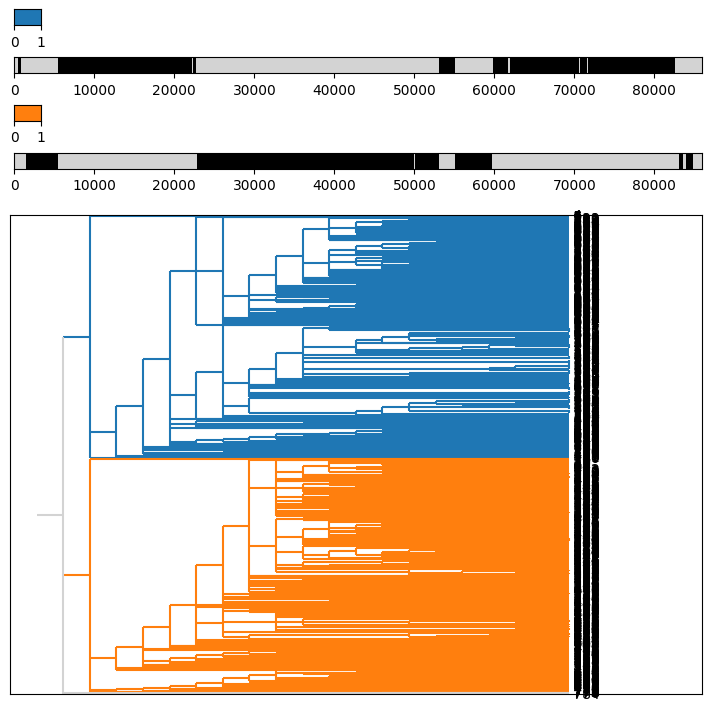

Subtree: [0, 0, 0]
None


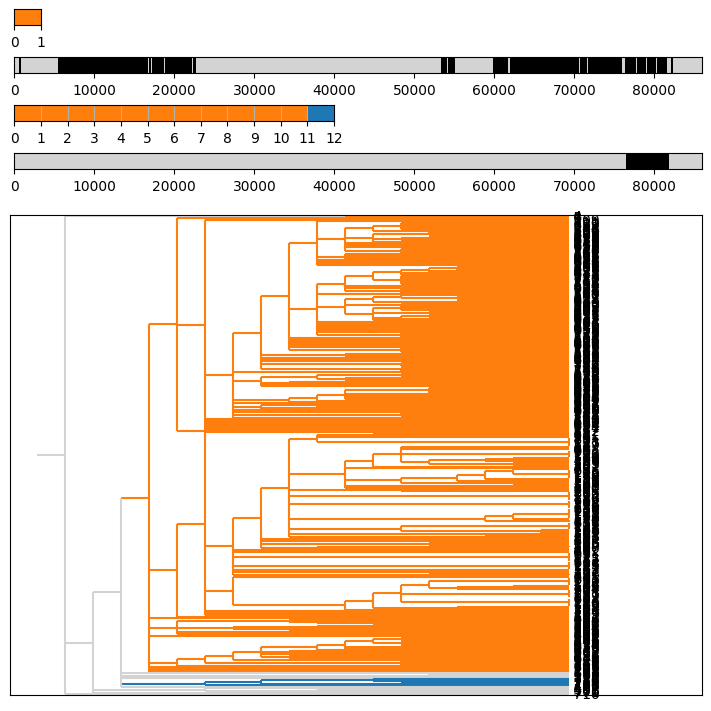

Subtree: [0, 0, 0, 0]
None


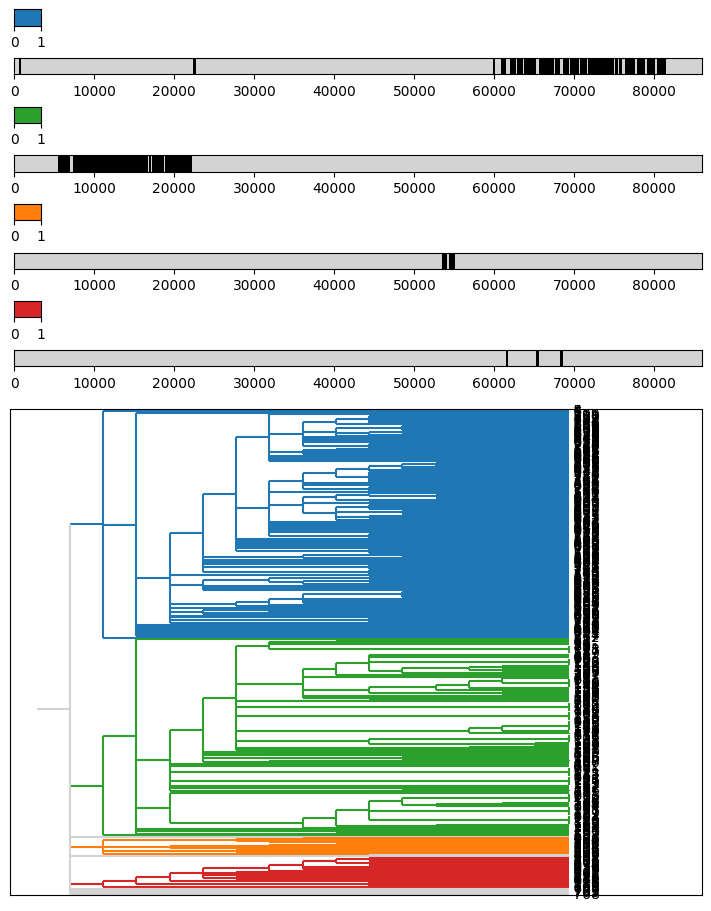

Subtree: [0, 0, 0, 0, 0]
None


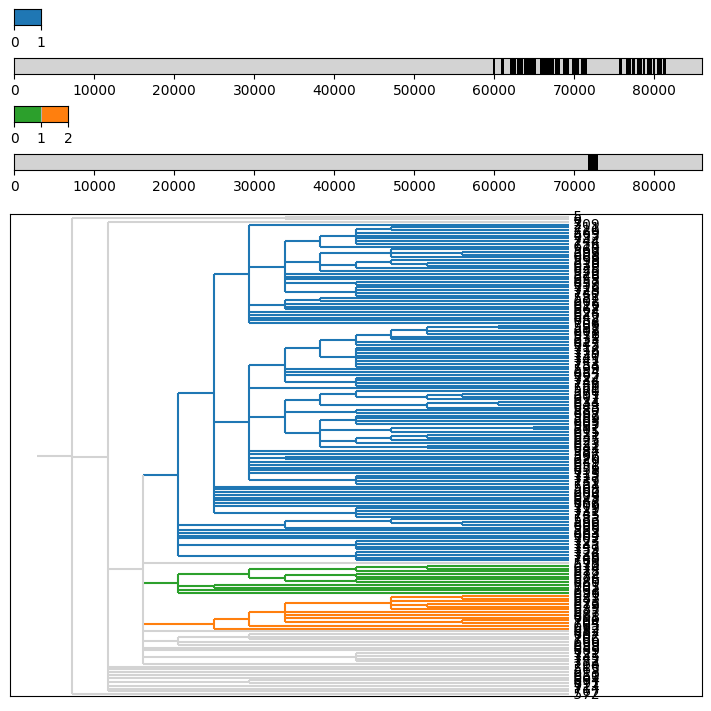

Subtree: [0, 0, 0, 0, 1]
None


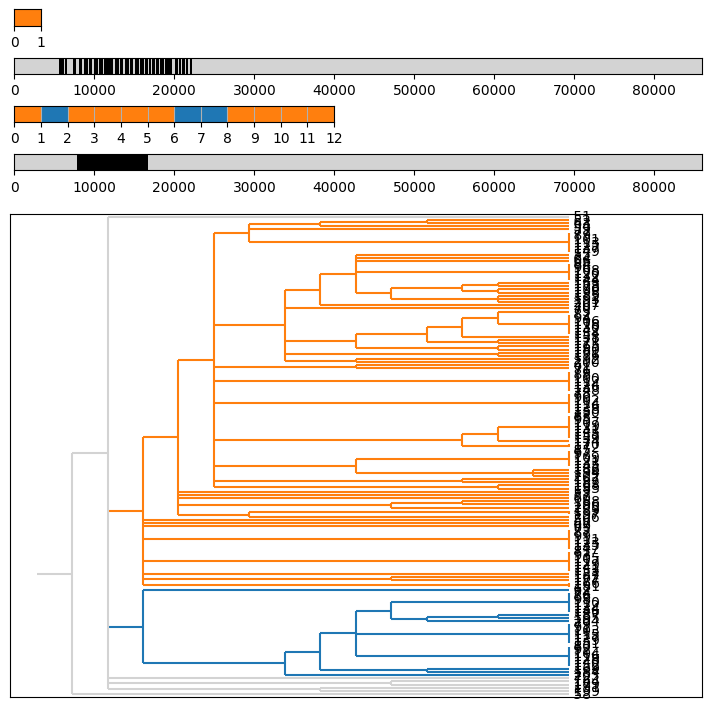

Subtree: [0, 0, 0, 0, 1, 1]
None


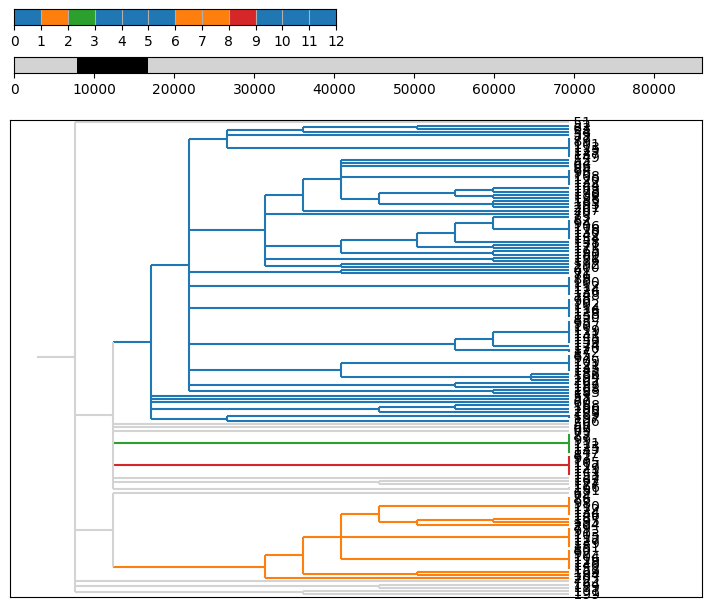

Subtree: [0, 0, 0, 1]
None


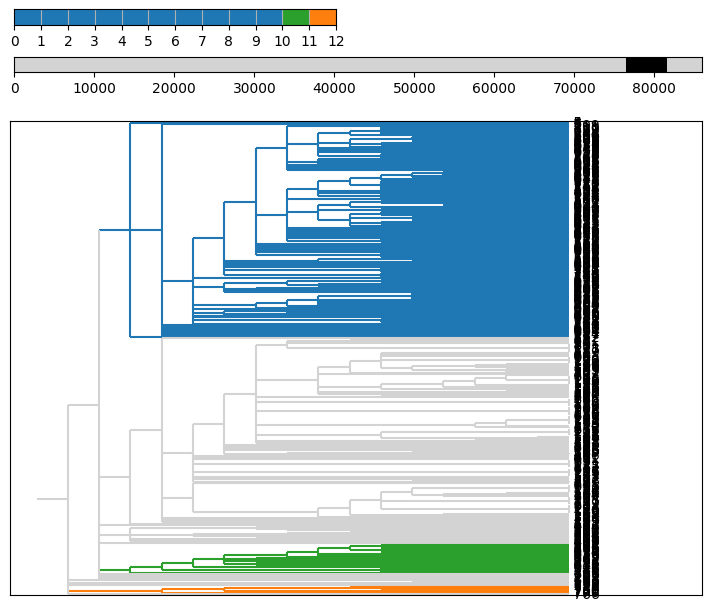

Subtree: [0, 0, 0, 1, 0]
None


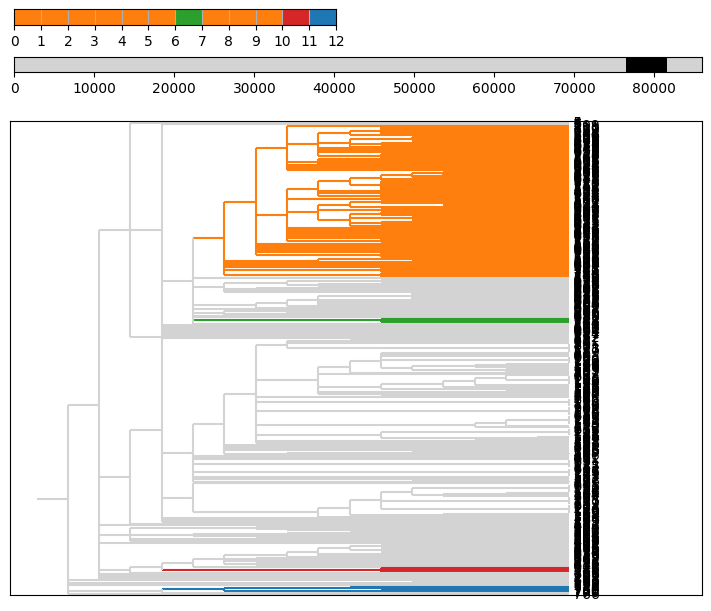

Subtree: [0, 0, 1]
None


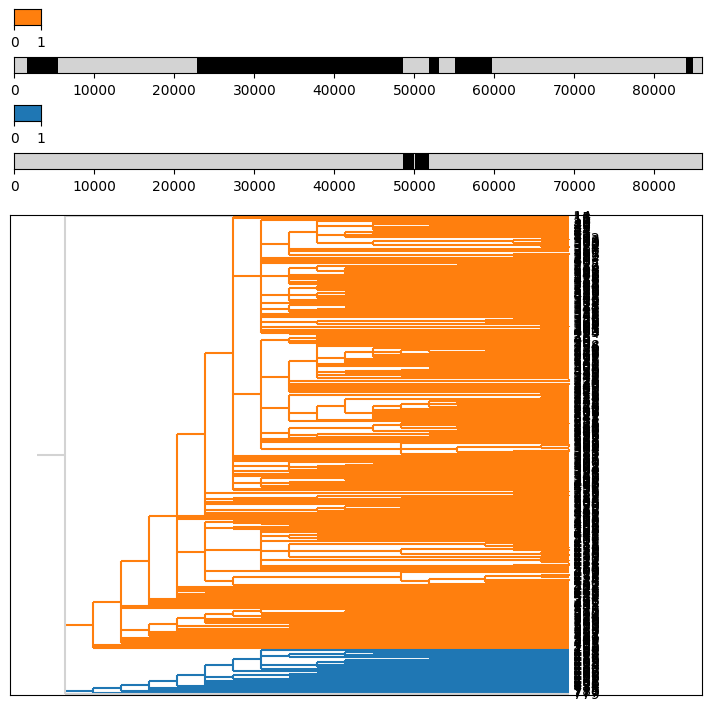

Subtree: [0, 0, 1, 0]
None


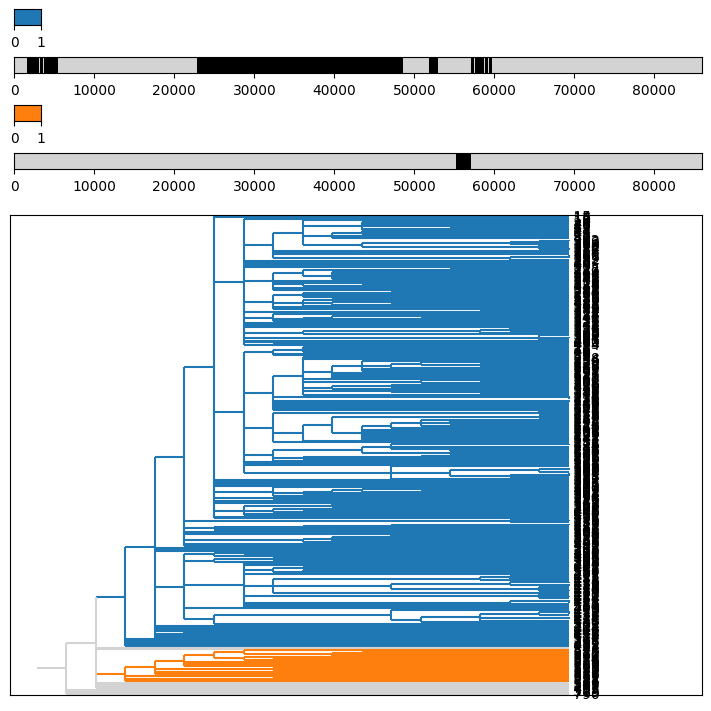

Subtree: [0, 0, 1, 0, 0]
None


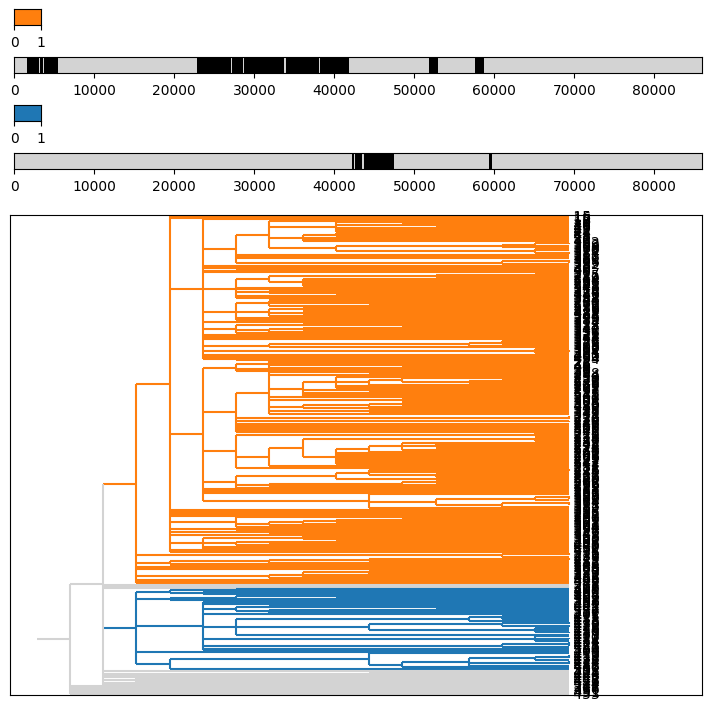

Subtree: [0, 0, 1, 0, 0, 0]
None


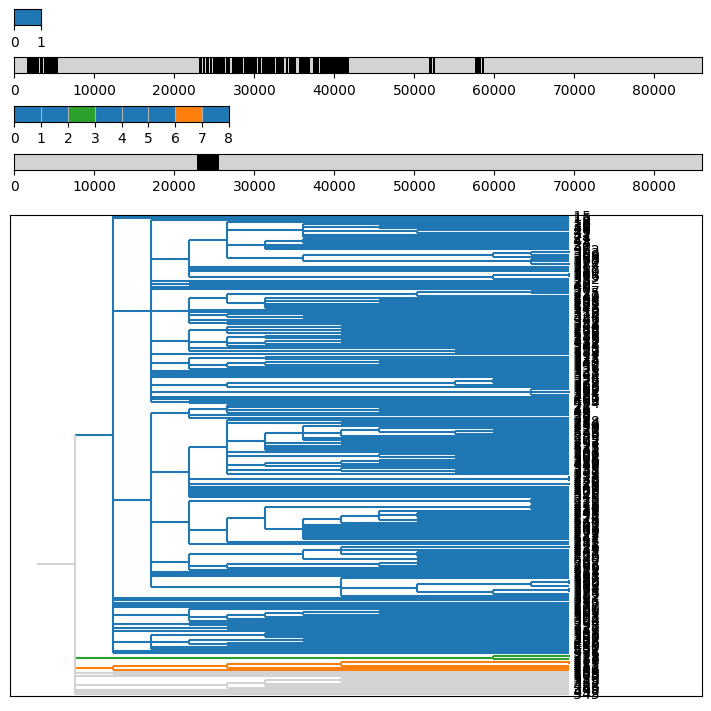

Subtree: [0, 0, 1, 0, 0, 0, 0]
None


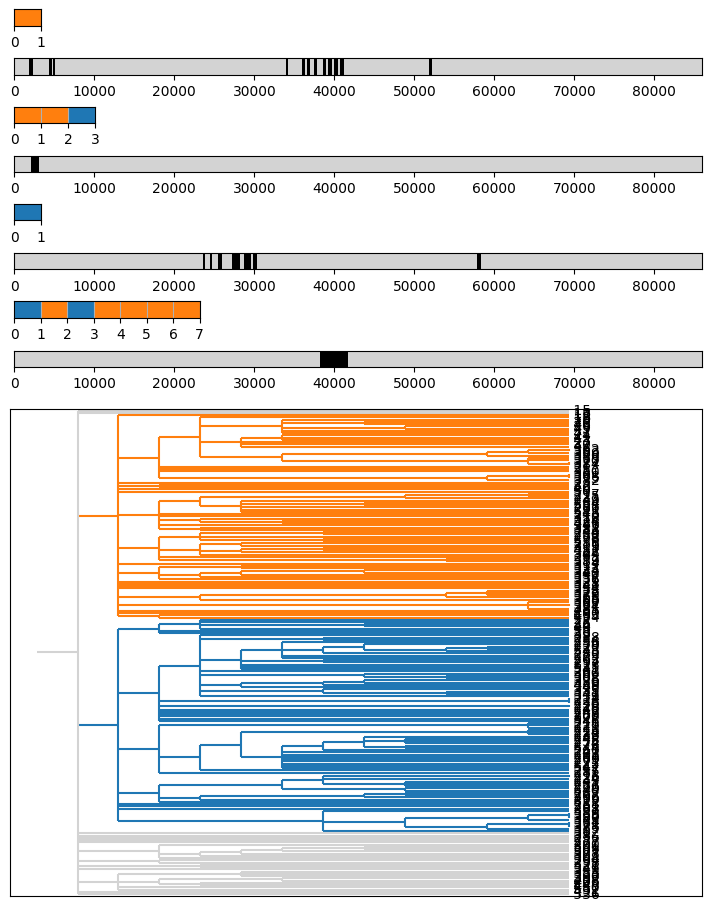

Subtree: [0, 0, 1, 0, 0, 1]
None


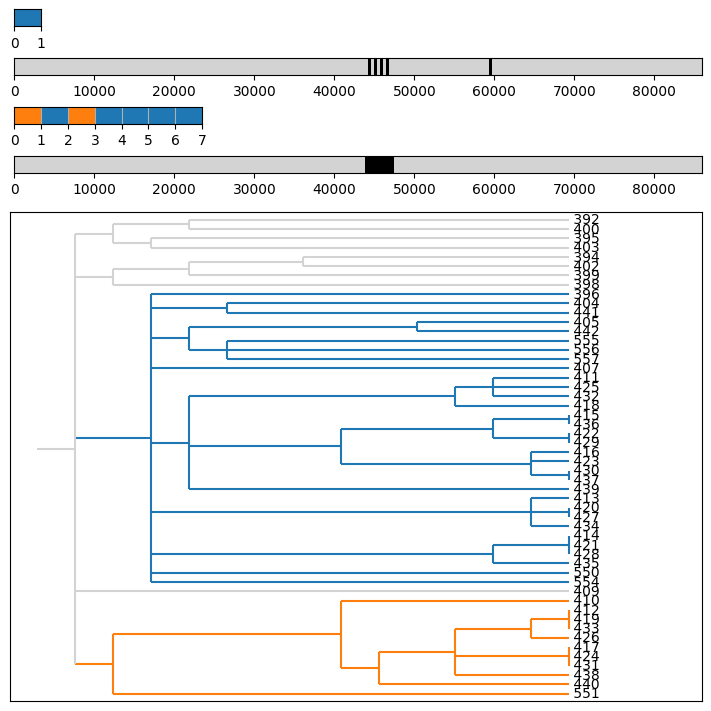

In [ ]:
show_hor_tree(hor_tree_root, tree)

None


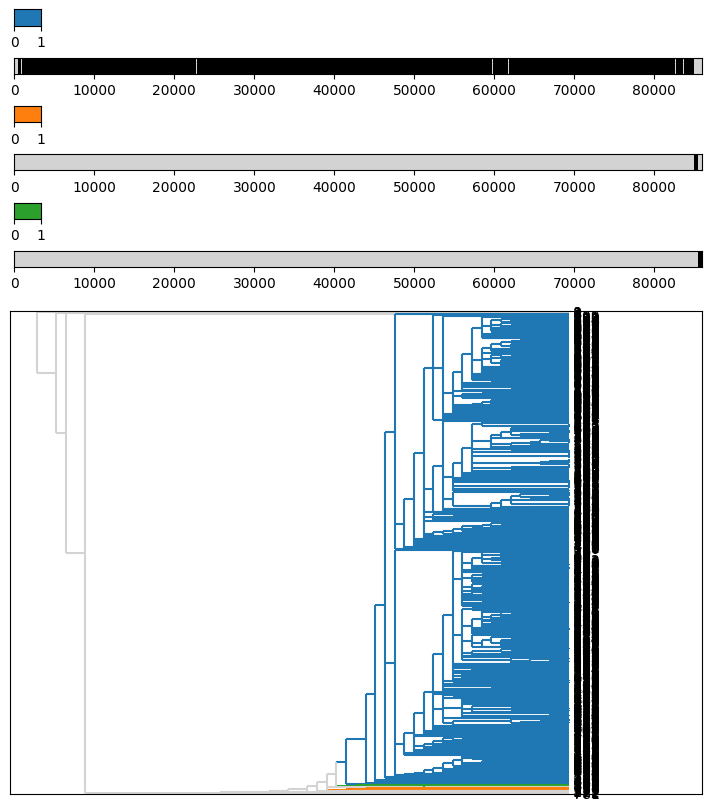

In [ ]:
show_hors(hor_tree_root.sub_hors, tree)

In [ ]:
actual_hors = [hor for hor in hors if len(hor.hor.clade_seq) > 1]

HOR: 0
Coverage (bp): 2140-3103


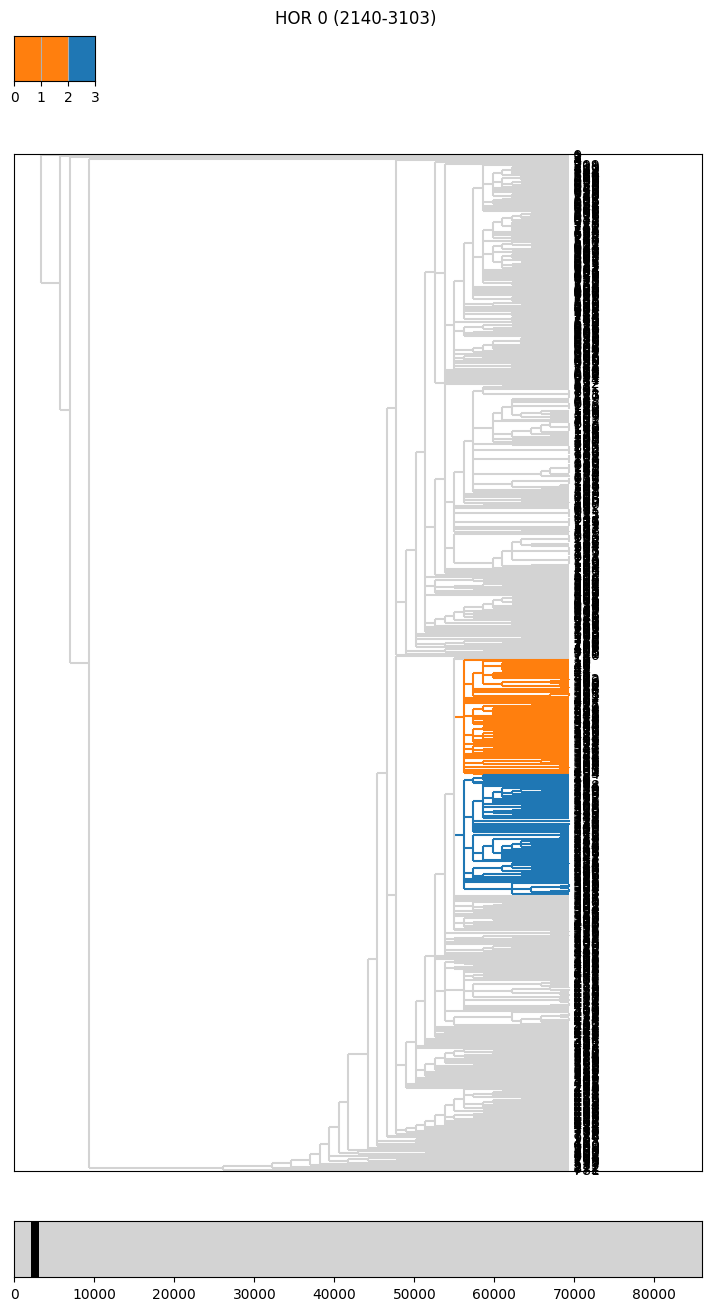

HOR: 1
Coverage (bp): 7811-16692


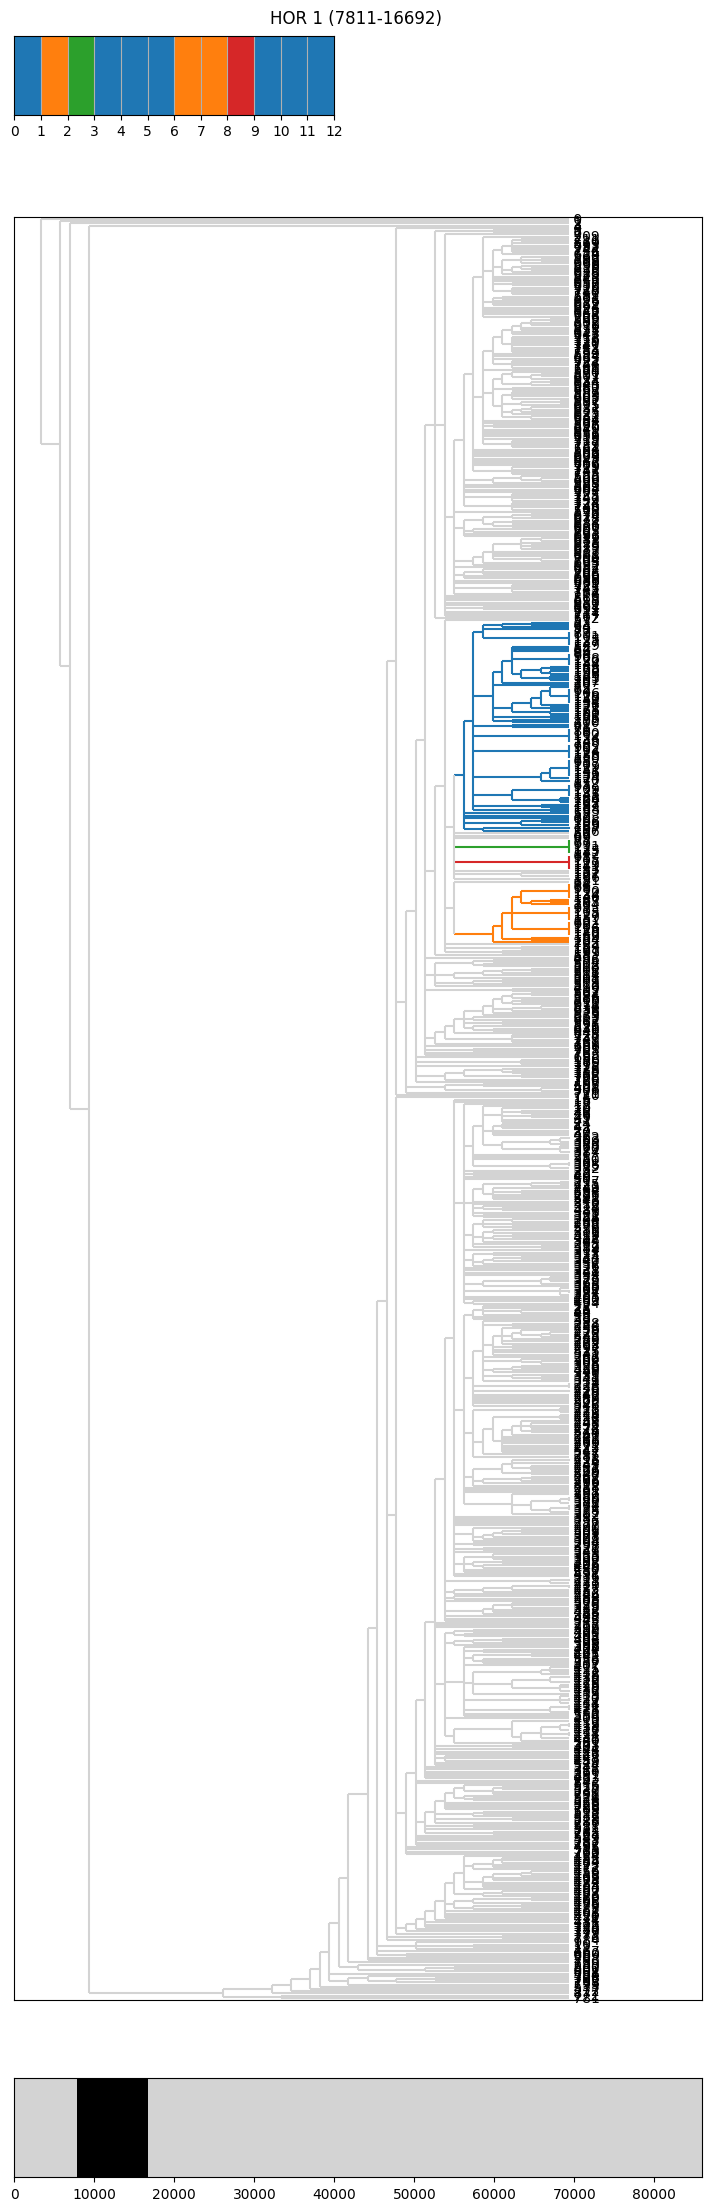

HOR: 2
Coverage (bp): 38199-41730


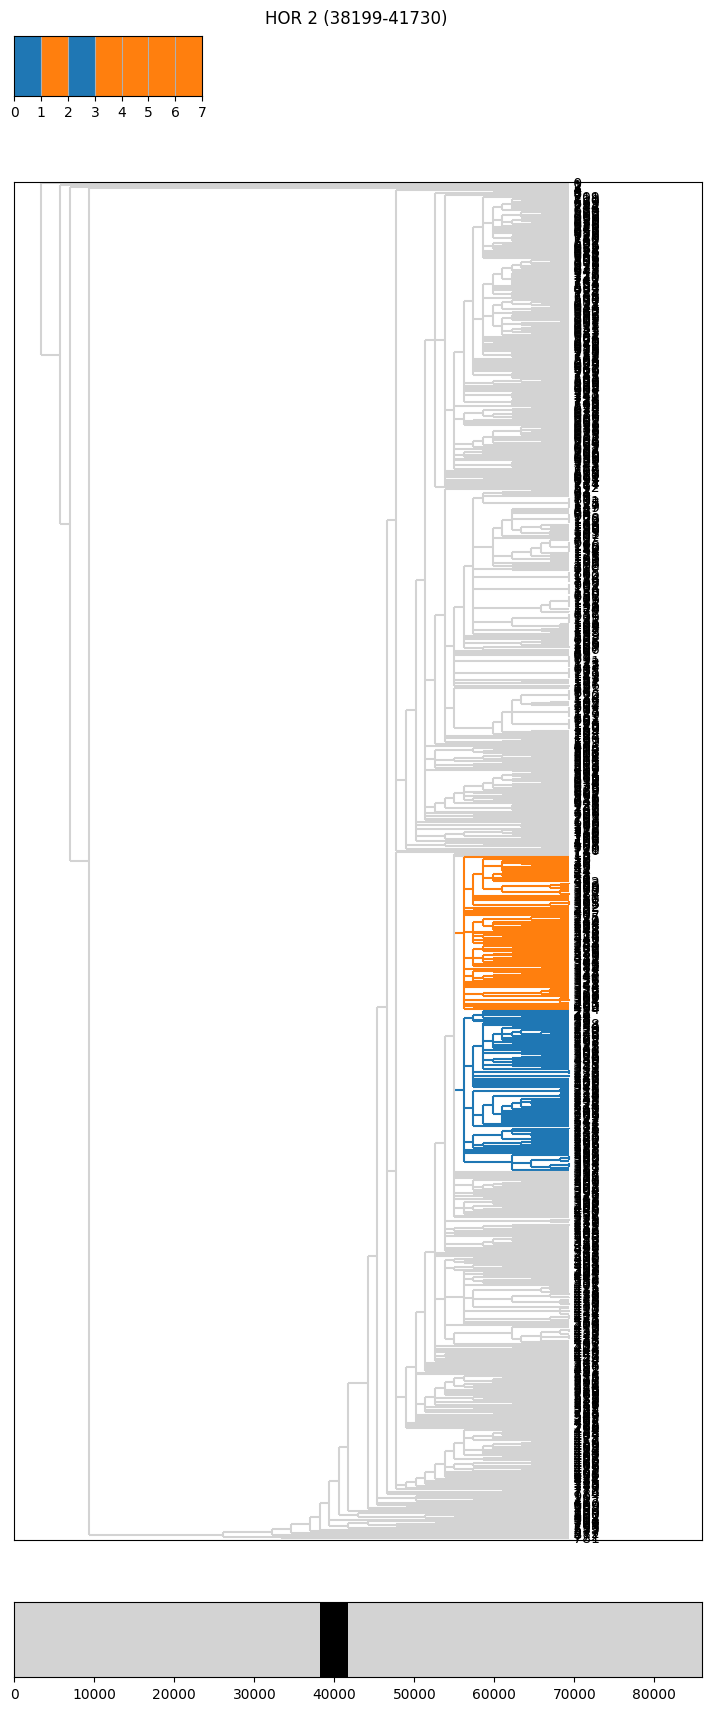

HOR: 3
Coverage (bp): 43870-47401


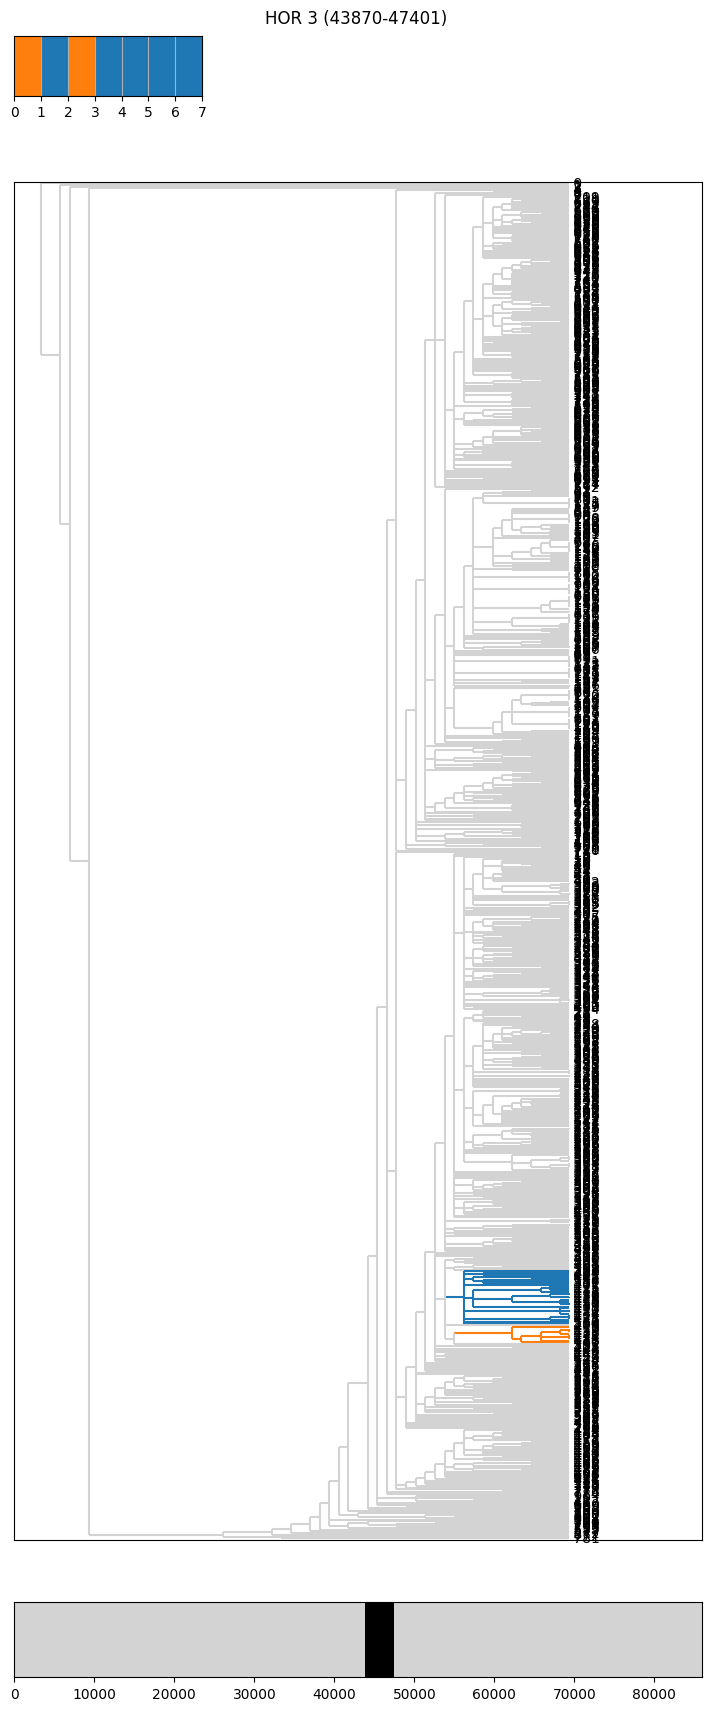

HOR: 4
Coverage (bp): 71690-72974


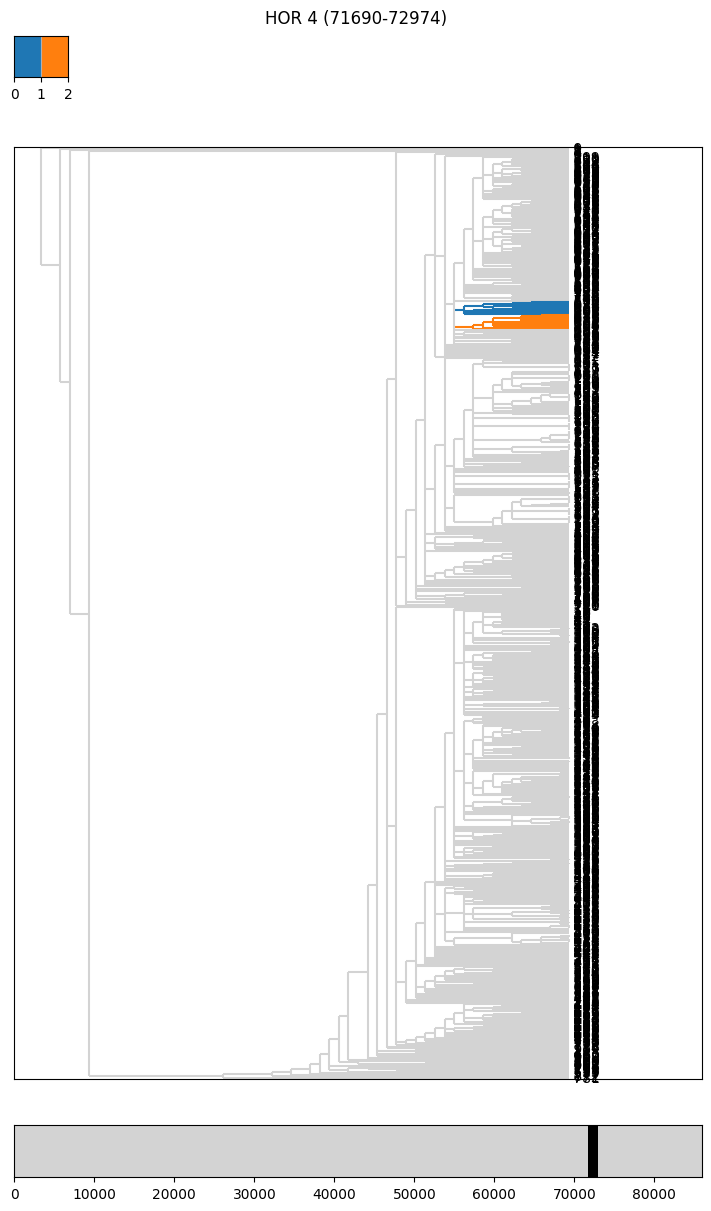

HOR: 5
Coverage (bp): 76505-81641


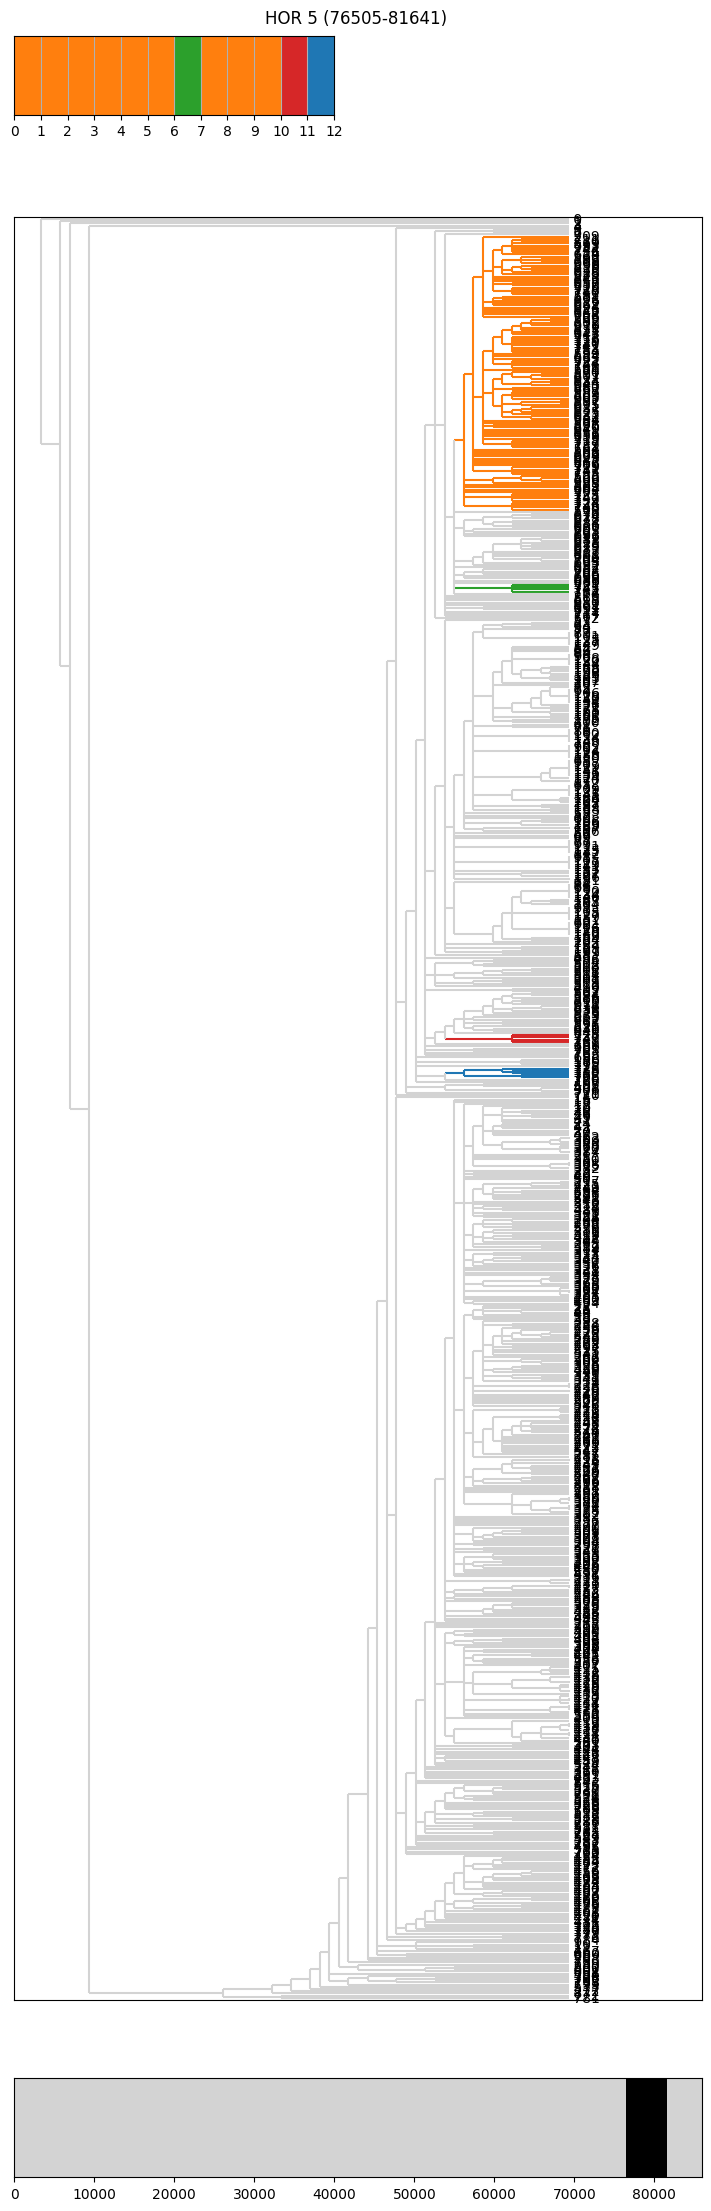

HOR: 6
Coverage (bp): 7811-16692


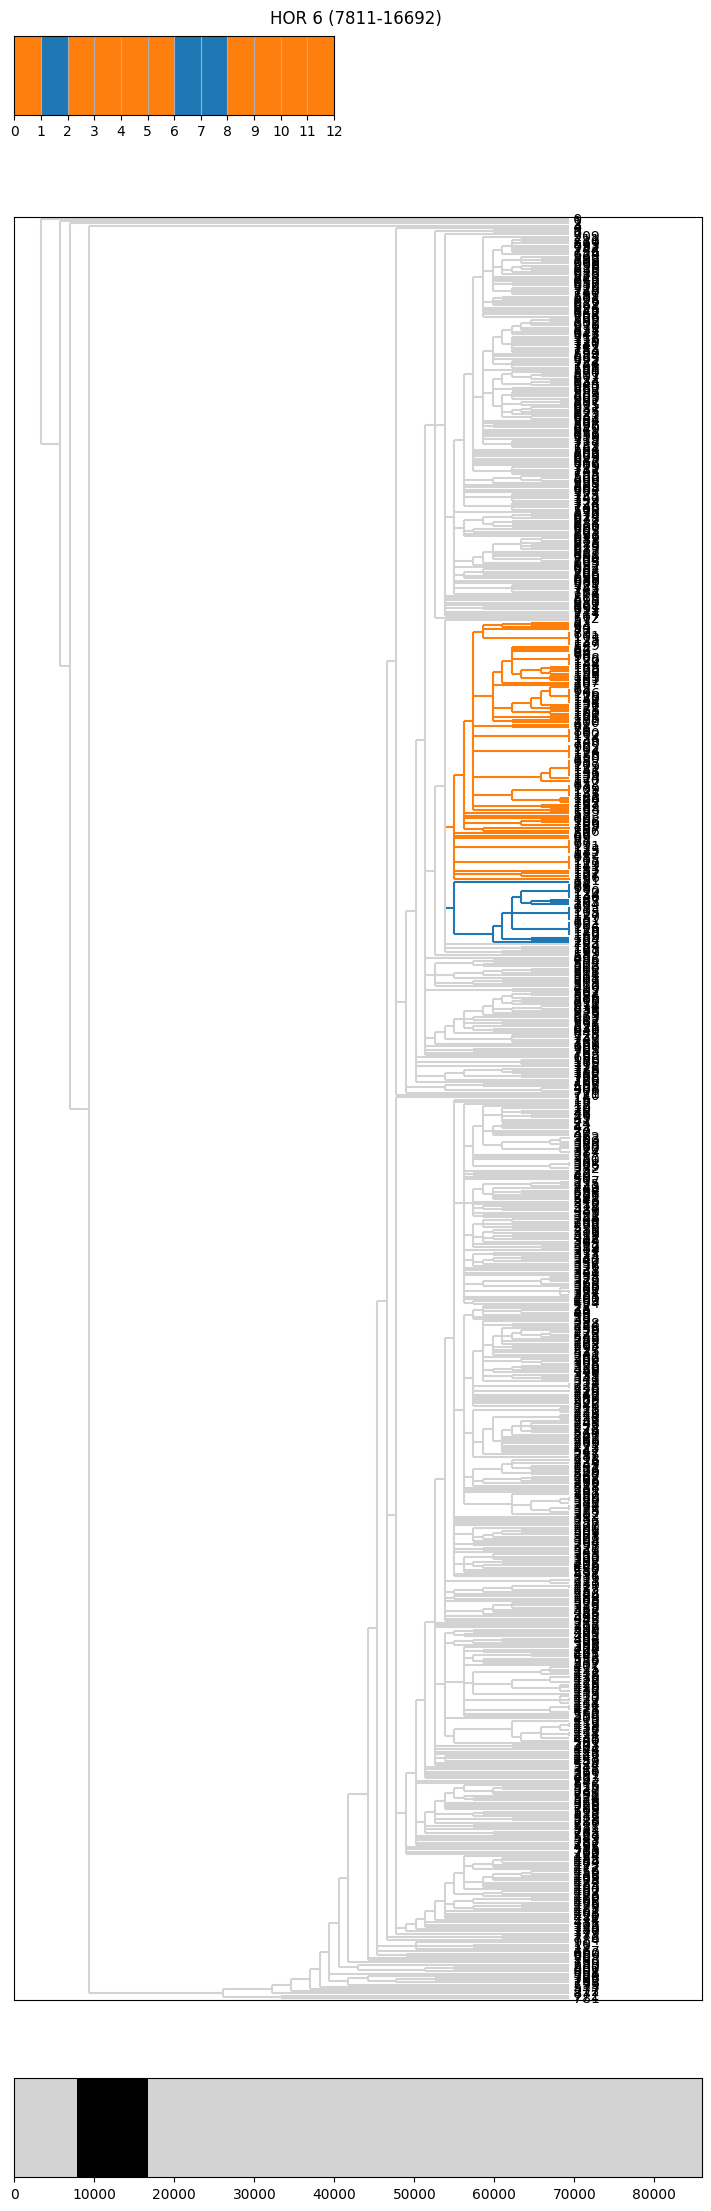

HOR: 7
Coverage (bp): 22791-25573


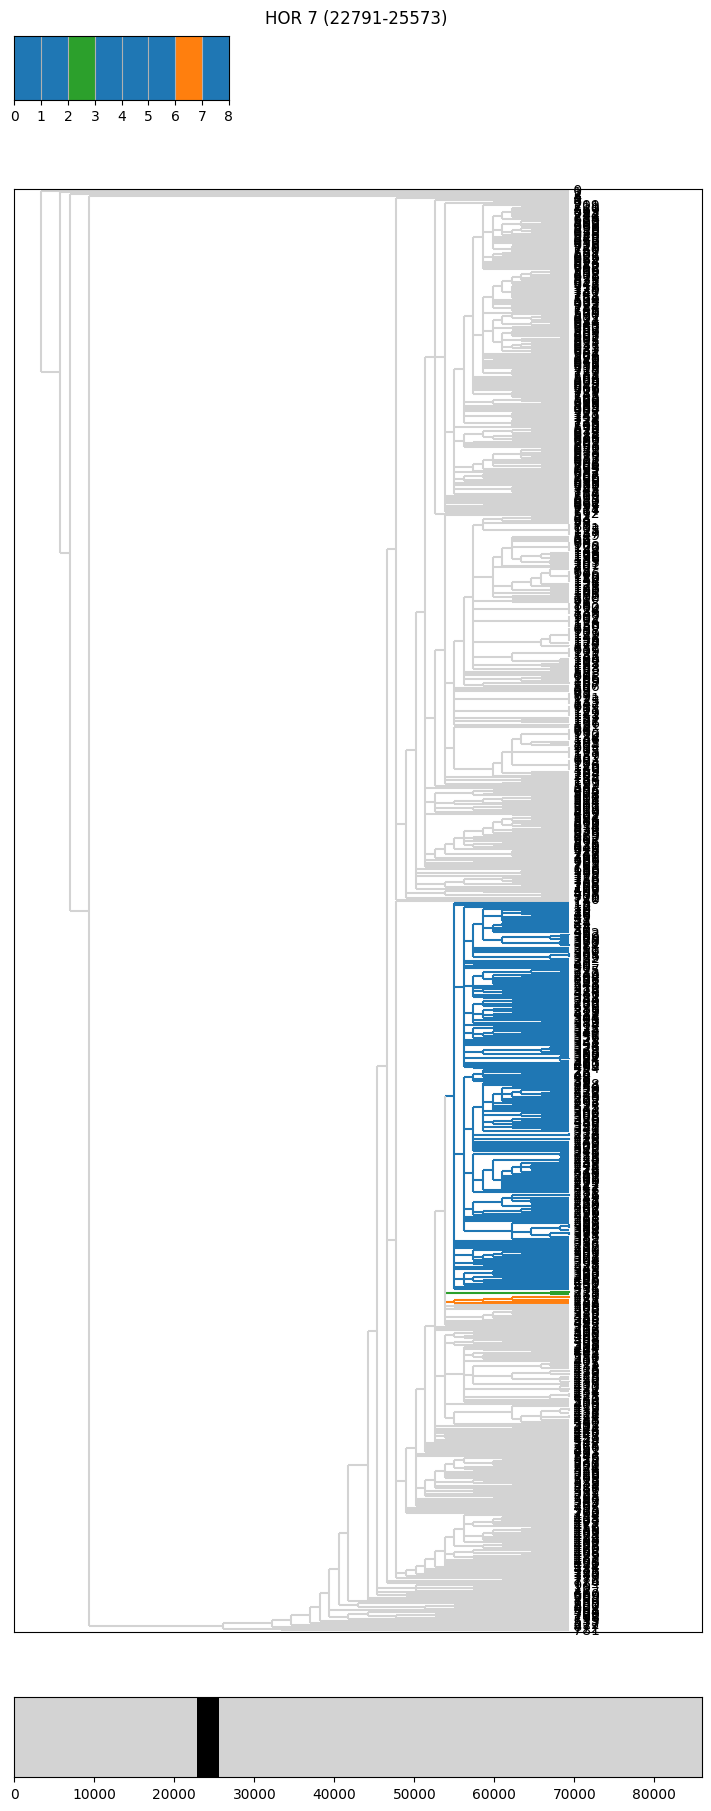

HOR: 8
Coverage (bp): 43870-47401


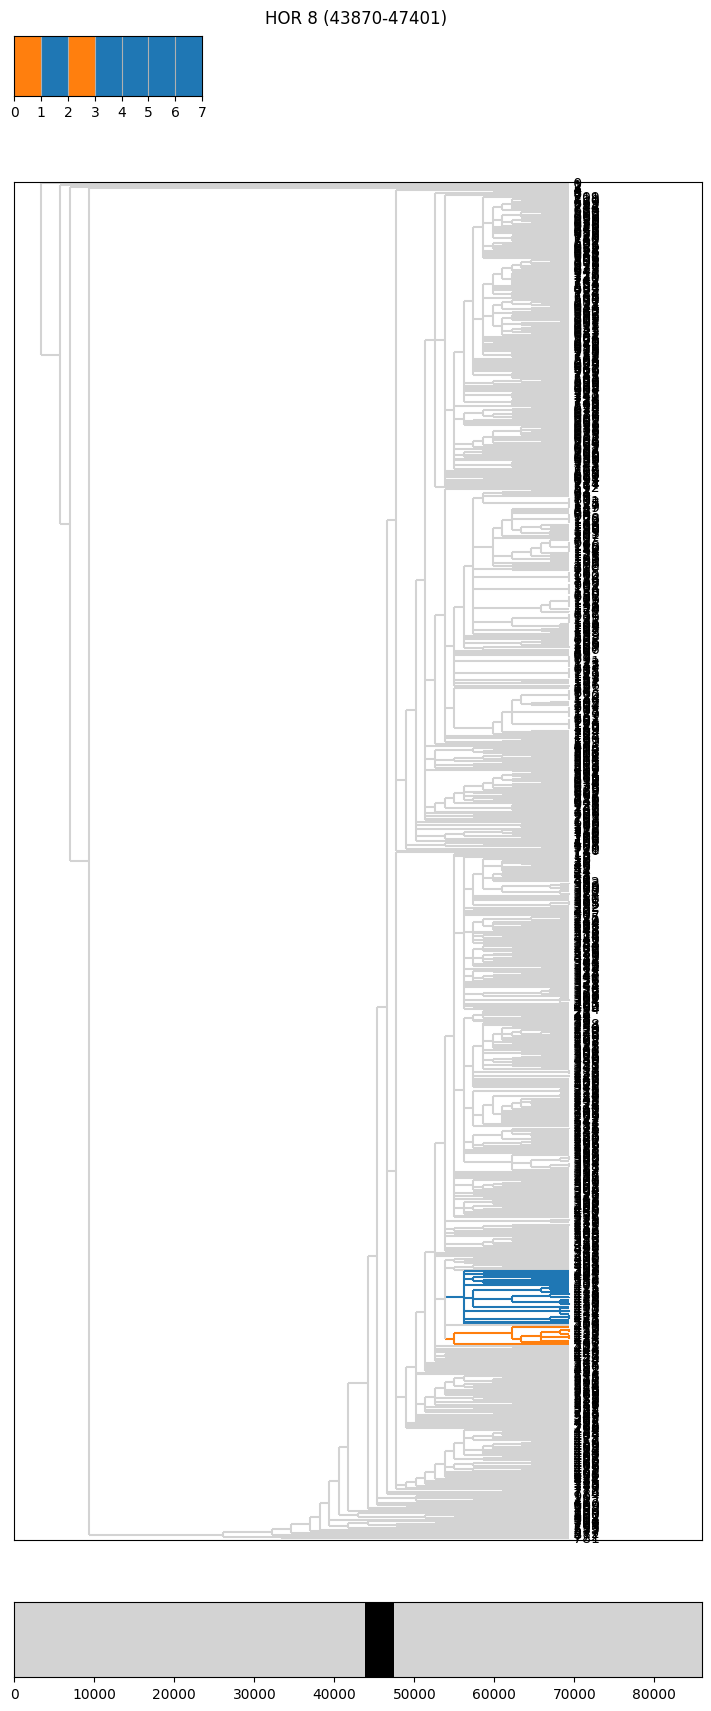

HOR: 9
Coverage (bp): 76505-81641


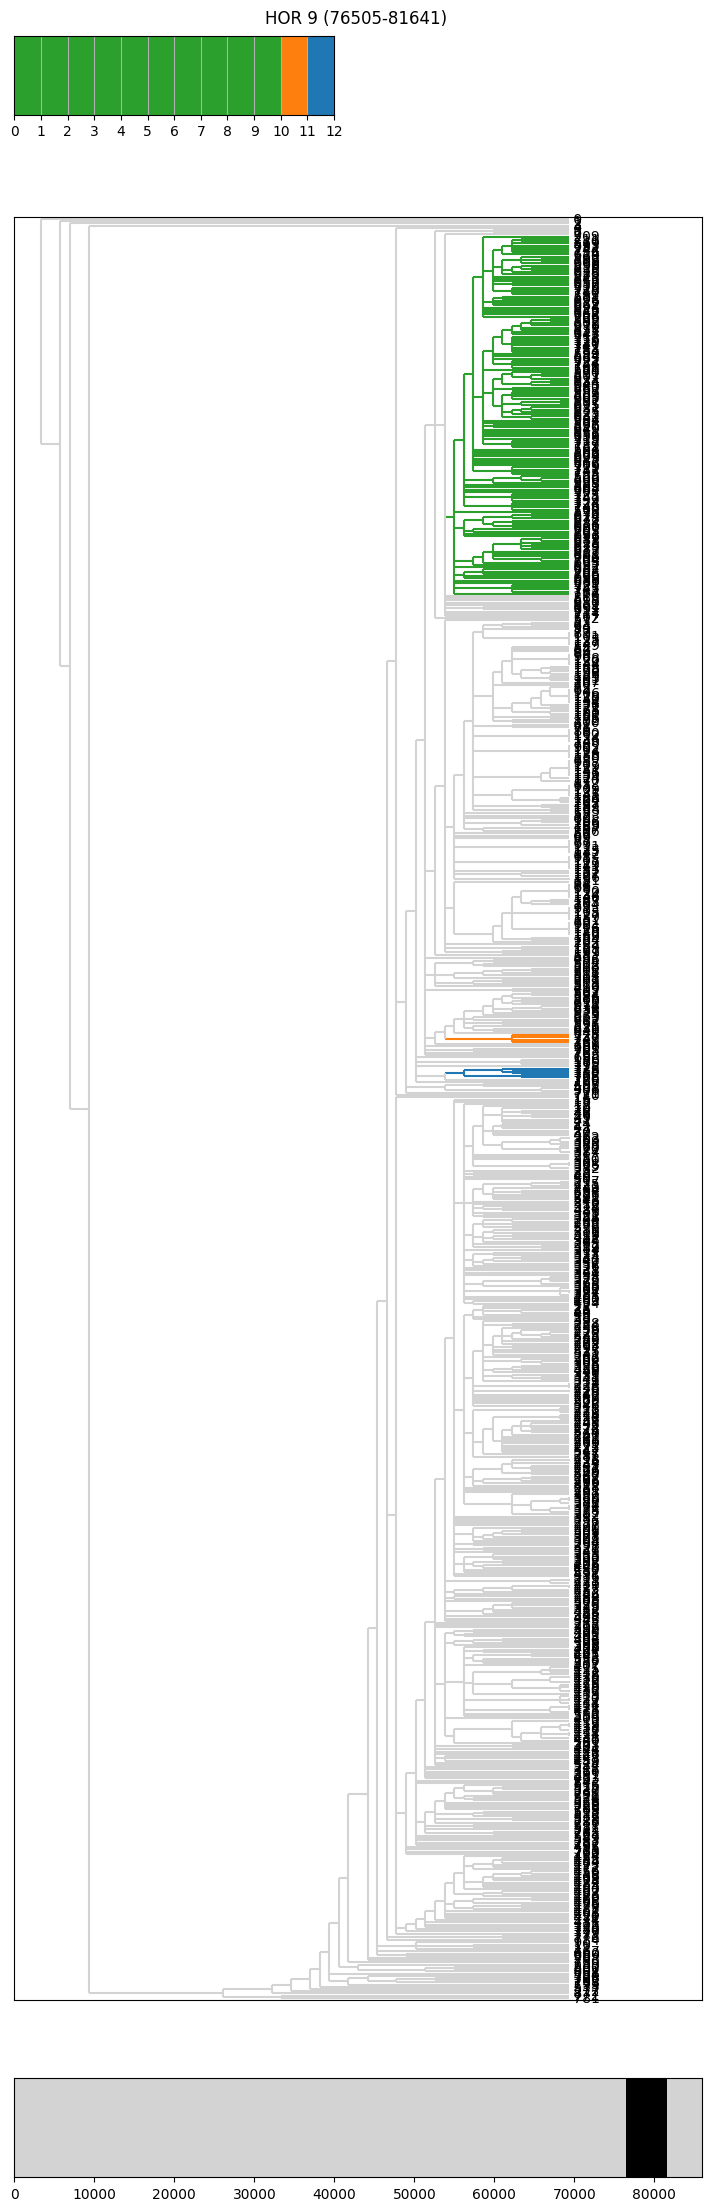

HOR: 10
Coverage (bp): 76505-81641


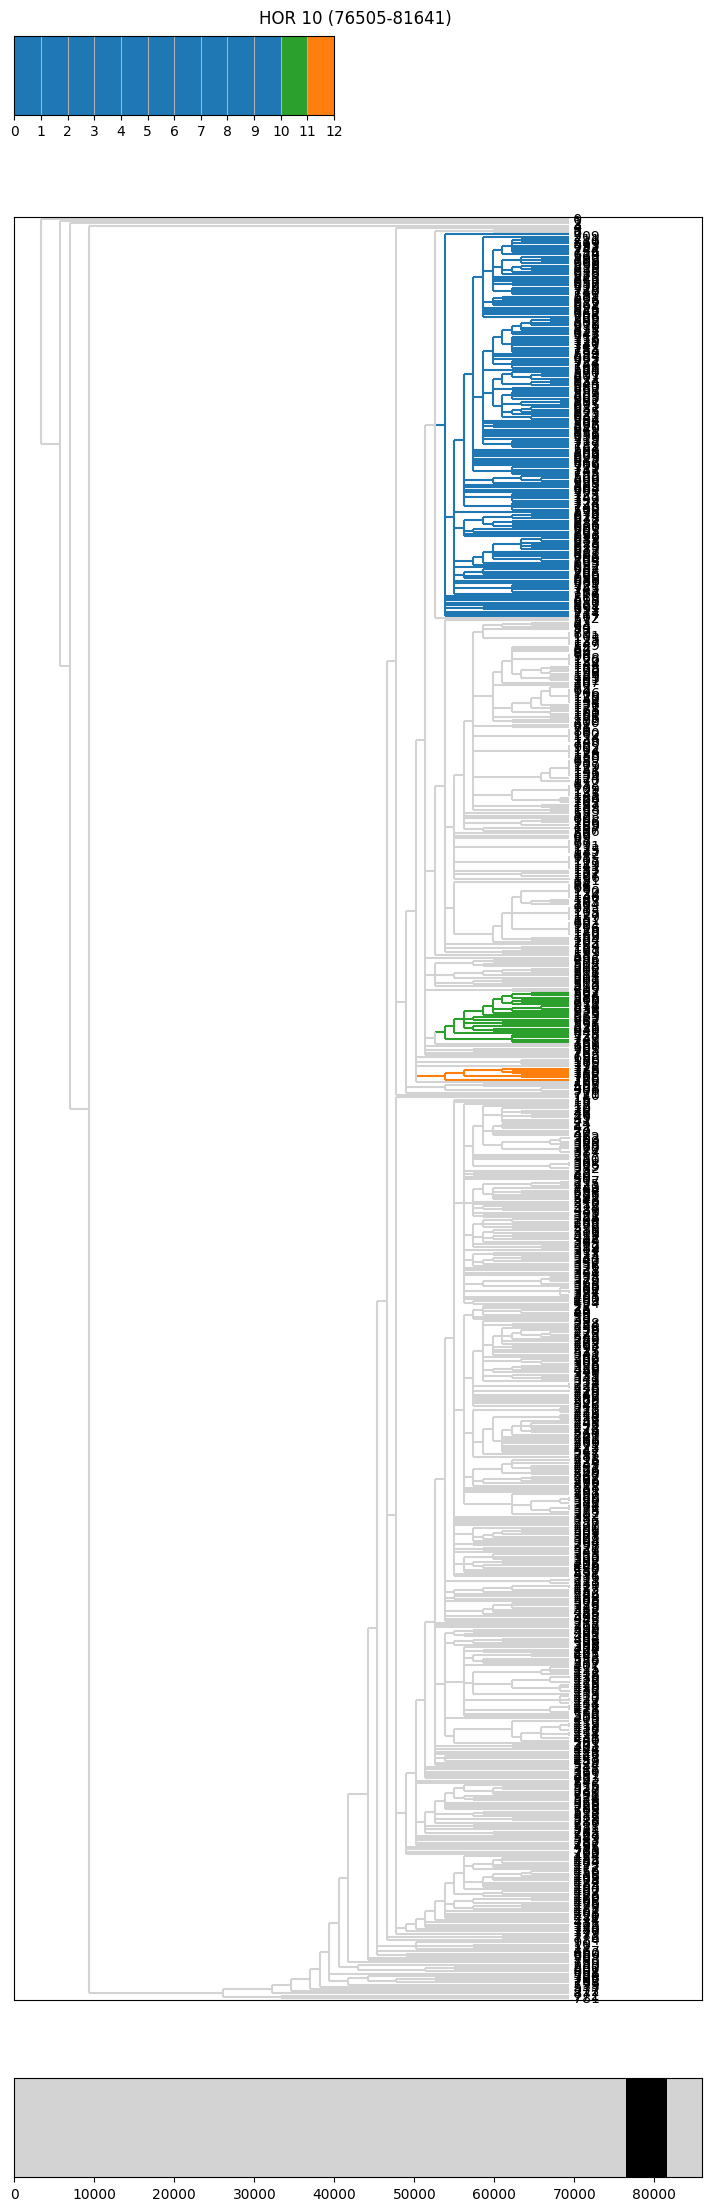

HOR: 11
Coverage (bp): 76505-81641


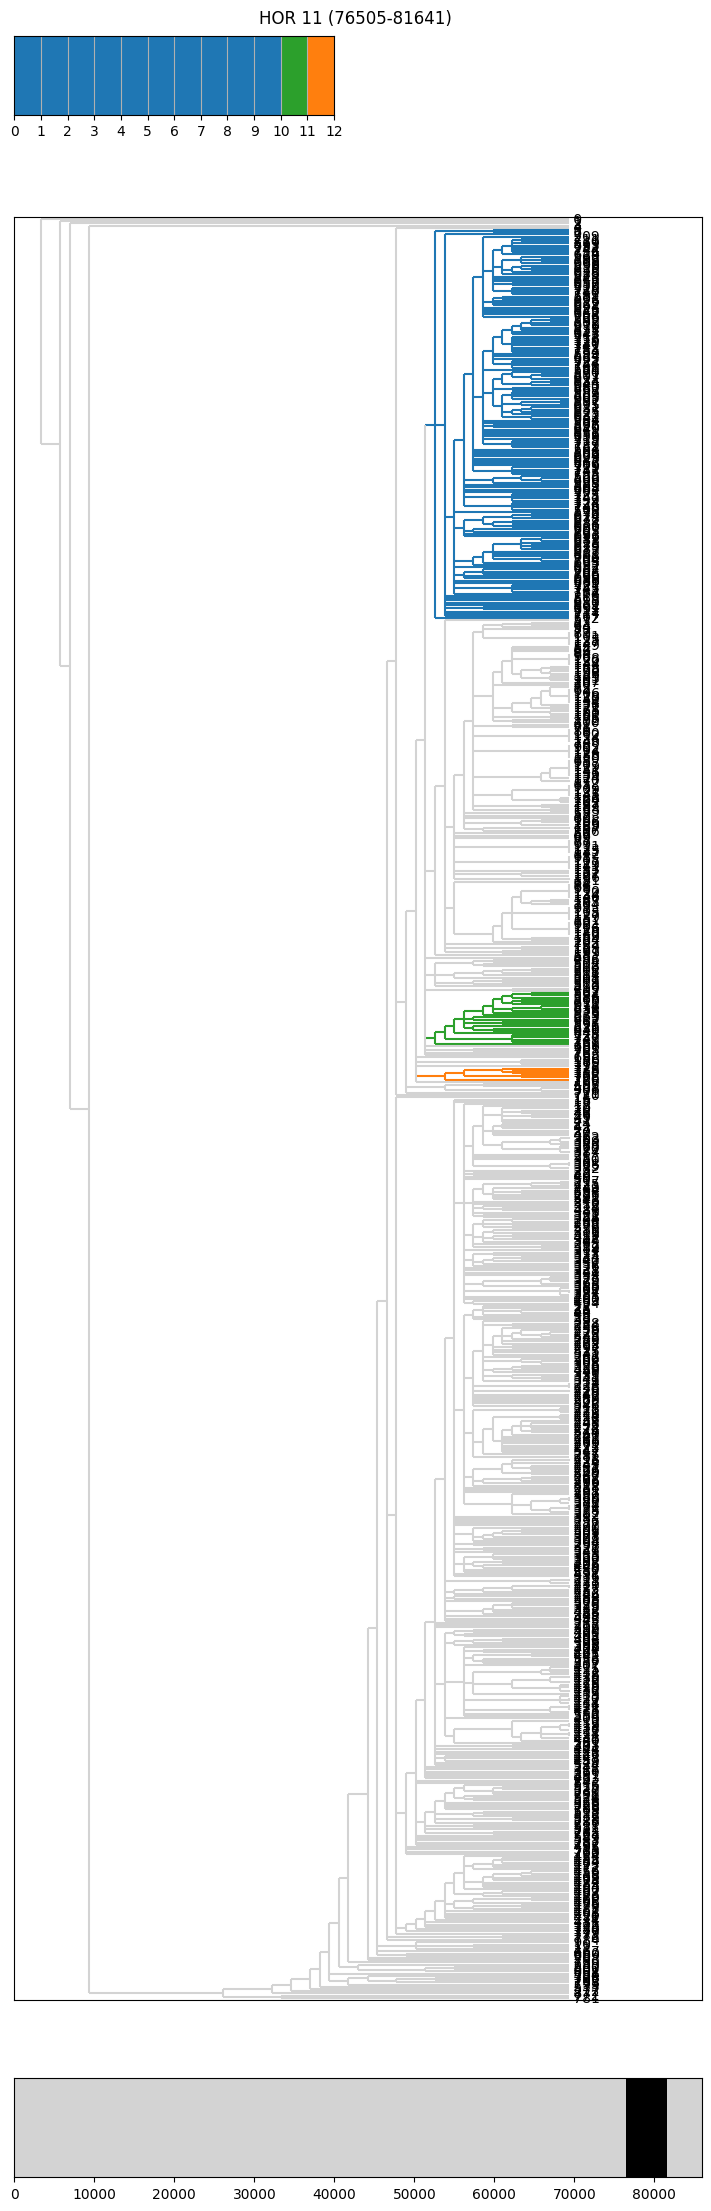

HOR: 12
Coverage (bp): 76505-81855


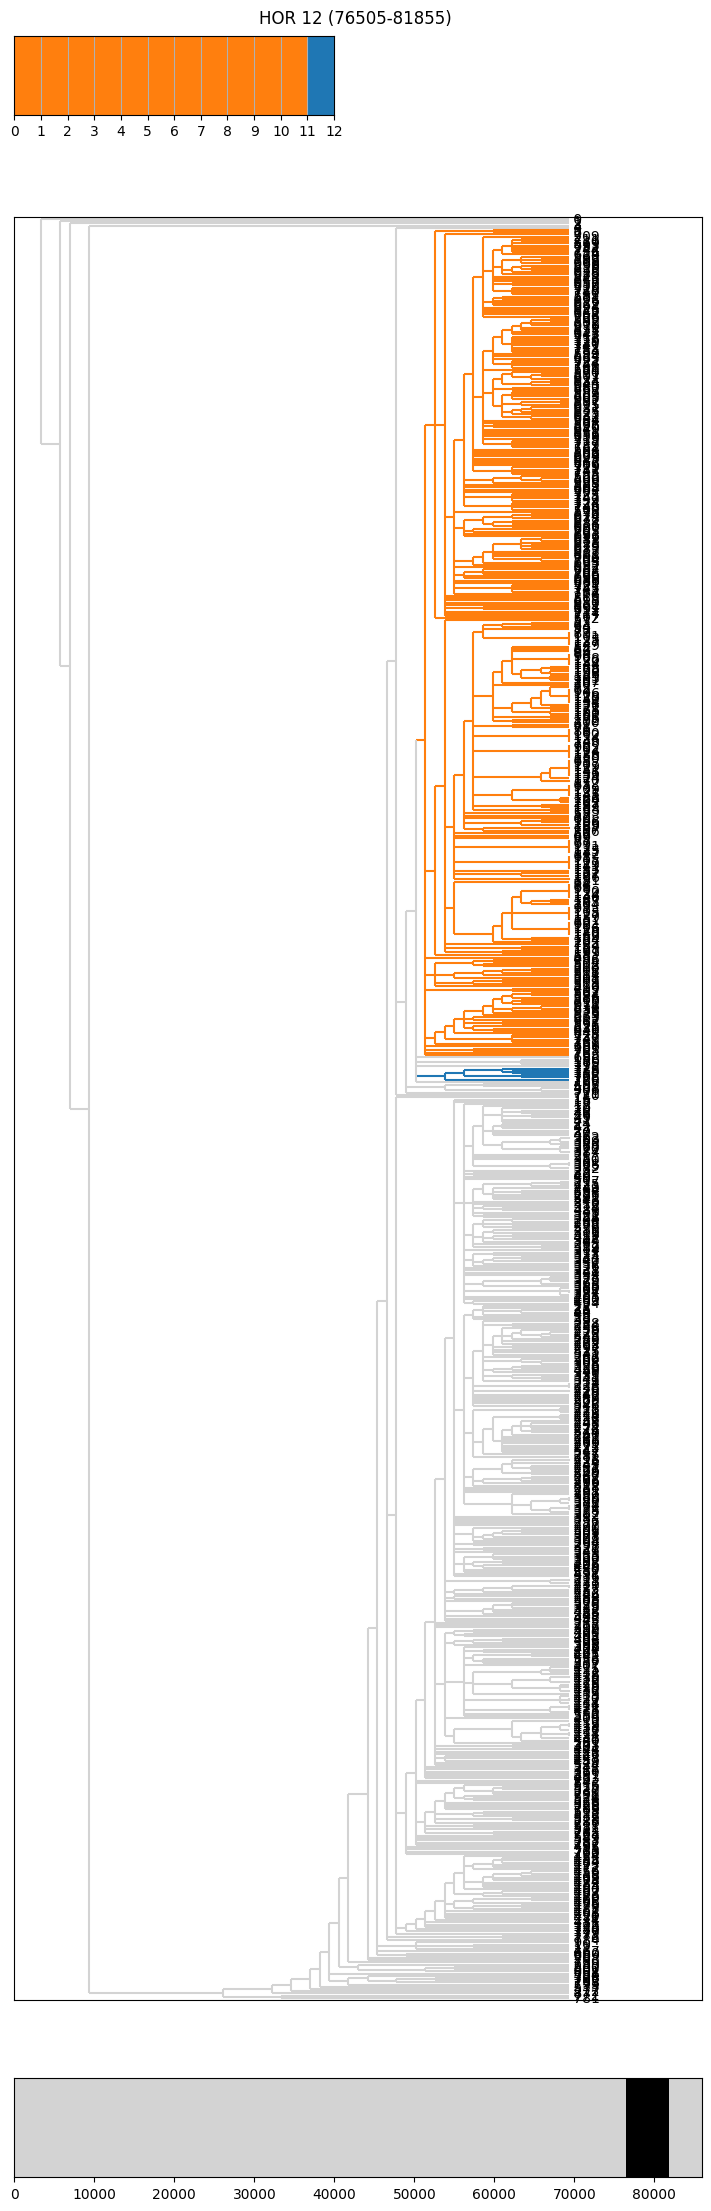

In [ ]:
for index, hor in enumerate(actual_hors):
   show_hor(hor, tree, label=index)

In [ ]:
tree_output_filename = f'data/vitis/clusterings/{seq_record.id.replace(":","_")}.tree.xml'
Phylo.write(tree, tree_output_filename, format='phyloxml')

1